In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import json

# Importing Data

In [68]:
df = pd.read_csv('archive/US_youtube_trending_data.csv')
df_category = pd.read_csv('archive/US_category_id.csv')

## Viewing data 

In [69]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [70]:
df_category.head()

,kind,etag,items__kind,items__etag,items__id,items__snippet__title,items__snippet__assignable,items__snippet__channelId
0,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,youtube#videoCategory,IfWa37JGcqZs-jZeAyFGkbeh6bc,1,Film & Animation,True,UCBR8-60-B28hp2BmDPdntcQ
1,NaN,NaN,youtube#videoCategory,5XGylIs7zkjHh5940dsT5862m1Y,2,Autos & Vehicles,True,UCBR8-60-B28hp2BmDPdntcQ
2,NaN,NaN,youtube#videoCategory,HCjFMARbBeWjpm6PDfReCOMOZGA,10,Music,True,UCBR8-60-B28hp2BmDPdntcQ
3,NaN,NaN,youtube#videoCategory,ra8H7xyAfmE2FewsDabE3TUSq10,15,Pets & Animals,True,UCBR8-60-B28hp2BmDPdntcQ
4,NaN,NaN,youtube#videoCategory,7mqChSJogdF3hSIL-88BfDE-W8M,17,Sports,True,UCBR8-60-B28hp2BmDPdntcQ


# Data Pre-Processing

## Checking Null Value

In [71]:
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   kind                        1 non-null      object
 1   etag                        1 non-null      object
 2   items__kind                 32 non-null     object
 3   items__etag                 32 non-null     object
 4   items__id                   32 non-null     int64 
 5   items__snippet__title       32 non-null     object
 6   items__snippet__assignable  32 non-null     bool  
 7   items__snippet__channelId   32 non-null     object
dtypes: bool(1), int64(1), object(6)
memory usage: 1.9+ KB


In [72]:
for col in df_category:
    print("Null Value in Column "+ col + " is : "+str(df_category[col].isnull().sum()))

Null Value in Column kind is : 31
Null Value in Column etag is : 31
Null Value in Column items__kind is : 0
Null Value in Column items__etag is : 0
Null Value in Column items__id is : 0
Null Value in Column items__snippet__title is : 0
Null Value in Column items__snippet__assignable is : 0
Null Value in Column items__snippet__channelId is : 0


In [73]:
for col in df:
    print("Null Value in Column "+ col + " is : "+str(df[col].isnull().sum()))

Null Value in Column video_id is : 0
Null Value in Column title is : 0
Null Value in Column publishedAt is : 0
Null Value in Column channelId is : 0
Null Value in Column channelTitle is : 0
Null Value in Column categoryId is : 0
Null Value in Column trending_date is : 0
Null Value in Column tags is : 0
Null Value in Column view_count is : 0
Null Value in Column likes is : 0
Null Value in Column dislikes is : 0
Null Value in Column comment_count is : 0
Null Value in Column thumbnail_link is : 0
Null Value in Column comments_disabled is : 0
Null Value in Column ratings_disabled is : 0
Null Value in Column description is : 413


#### Dropping Columns

In [74]:
df_category.drop(['kind', 'etag','items__kind','items__etag','items__snippet__assignable', 'items__snippet__channelId'],axis=1,inplace=True)

In [75]:
df_category.shape[0], df_category['items__snippet__title'].unique()

(32,
 array(['Film & Animation', 'Autos & Vehicles', 'Music', 'Pets & Animals',
        'Sports', 'Short Movies', 'Travel & Events', 'Gaming',
        'Videoblogging', 'People & Blogs', 'Comedy', 'Entertainment',
        'News & Politics', 'Howto & Style', 'Education',
        'Science & Technology', 'Nonprofits & Activism', 'Movies',
        'Anime/Animation', 'Action/Adventure', 'Classics', 'Documentary',
        'Drama', 'Family', 'Foreign', 'Horror', 'Sci-Fi/Fantasy',
        'Thriller', 'Shorts', 'Shows', 'Trailers'], dtype=object))

#### From above we can see that 
1. there are 32 video category present in data
2. After seeing category data we can apply Aggregation method to group then into more Smaller sub group's
    * [Entertainment] -> {Film & Animation, Short Movies, Entertainment, Shows, Shorts, Music, Trailers}
    * [FilmCategory]  -> {News & Politics, Comedy, Science & Technology, Anime/Animation, Action/Adventure, Classics, Documentary , Drama, Family, Horror, Sci-Fi/Fantasy, Thriller, Shorts}
    * [other] -> {Autos & Vehicles, Travel & Events,  Sports, Gaming, Howto & Style, Nonprofits & Activism,Foreign}
    * [Life] -> {Videoblogging, Pets & Animals, People & Blogs,Education}

In [76]:
Entertainment = ['Film & Animation', 'Short Movies', 'Entertainment', 'Shows', 'Shorts', 'Music', 'Trailers']
FilmCategory = ['News & Politics', 'Comedy', 'Science & Technology', 'Anime/Animation','Action/Adventure', 'Classics','Documentary' ,'Drama','Family','Horror', 'Sci-Fi/Fantasy','Thriller', 'Shorts']
Other = ['Autos & Vehicles', 'Travel & Events',  'Sports', 'Gaming', 'Howto & Style', 'Nonprofits & Activism','Foreign']
Life = ['Videoblogging', 'Pets & Animals', 'People & Blogs','Education']
def createCategory(cat):
    if cat in Entertainment:
        return 'Entertainment'
    elif cat in FilmCategory:
        return 'FilmCategory'
    elif cat in Other:
        return 'Other'
    else:
        return 'Life'

In [77]:
def getcategory(col):
    r_index = df_category[df_category['items__id'] == col].index[0]
    return df_category.iloc[r_index]['items__snippet__title']
    

In [78]:
data = df[['title', 'categoryId','tags', 'view_count', 'likes',
       'dislikes', 'comment_count','description']]
data.head()

,title,categoryId,tags,view_count,likes,dislikes,comment_count,description
0,I ASKED HER TO BE MY GIRLFRIEND...,22,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,Apex Legends | Stories from the Outlands – “Th...,20,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,"While running her own modding shop, Ramya Pare..."
2,I left youtube for a month and THIS is what ha...,24,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,I left youtube for a month and this is what ha...
3,XXL 2020 Freshman Class Revealed - Official An...,10,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,Ultimate DIY Home Movie Theater for The LaBran...,26,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,Transforming The LaBrant Family's empty white ...


In [79]:
data['categoryId'] = data['categoryId'].apply(getcategory)

<ipython-input-79-eafce64d0a04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['categoryId'] = data['categoryId'].apply(getcategory)


In [80]:
data['categoryId'].value_counts()

Music                    10931
Entertainment            10912
Gaming                    7021
Sports                    5992
People & Blogs            4583
Comedy                    3031
Science & Technology      2225
News & Politics           2182
Howto & Style             2144
Film & Animation          2088
Education                 1157
Autos & Vehicles           963
Pets & Animals             312
Travel & Events            207
Nonprofits & Activism       43
Name: categoryId, dtype: int64

In [81]:
data['categoryId'] = data['categoryId'].apply(createCategory)

<ipython-input-81-4fbecf3d2068>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['categoryId'] = data['categoryId'].apply(createCategory)


In [82]:
data['categoryId'].value_counts(),data['categoryId'].unique()

(Entertainment    23931
 Other            16370
 FilmCategory      7438
 Life              6052
 Name: categoryId, dtype: int64,
 array(['Life', 'Other', 'Entertainment', 'FilmCategory'], dtype=object))

In [83]:
data['description'].head(10)

0    SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1    While running her own modding shop, Ramya Pare...
2    I left youtube for a month and this is what ha...
3    Subscribe to XXL → http://bit.ly/subscribe-xxl...
4    Transforming The LaBrant Family's empty white ...
5    Subscribe To My Channel - https://www.youtube....
6    Hi babygirls!  Thank you so much for watching ...
7    ‣ What Was TEKOI: https://www.youtube.com/watc...
8    Since I was little, i've had these goals for m...
9    Vengo De Nada - Ovi x Natanael Cano x Aleman x...
Name: description, dtype: object

after seeing some values from description table we can conclued that we can drop this as this contains <br>
links , Subscribe most of the times which can not be used for segniment analysis

In [84]:
data.drop(['description'], inplace=True, axis = 1)

D:\programs\conda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [92]:
c = data['tags'].head()[0].split("|")
for i in c:
    if len(i.split())>1:
        for j in i.split():
            print(j+" ")
    else:
        print(i+" ")

brawadis 
prank 
basketball 
skits 
ghost 
funny 
videos 
vlog 
vlogging 
NBA 
browadis 
challenges 
bmw 
i8 
faze 
rug 
faze 
rug 
brother 
mama 
rug 
and 
papa 
rug 


In [93]:
def cleanTags(col):
    st = ''
    c = col.split('|')
    for i in c:
        if len(i.split())>1:
            for j in i.split():
                st += j+" "
        else:
            st+= i+" "
    
        
    return st

In [94]:
data['tags'] = data['tags'].apply(cleanTags)


<ipython-input-94-18277a14d961>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tags'] = data['tags'].apply(cleanTags)


'brawadis prank basketball skits ghost funny videos vlog vlogging NBA browadis challenges bmw i8 faze rug faze rug brother mama rug and papa rug '

In [95]:
data['tags'].head()

0    brawadis prank basketball skits ghost funny vi...
1    Apex Legends Apex Legends characters new Apex ...
2    jacksepticeye funny funny meme memes jacksepti...
3    xxl freshman xxl freshmen 2020 xxl freshman 20...
4    The LaBrant Family DIY Interior Design Makeove...
Name: tags, dtype: object

In [101]:
data['title_tags'] = data['title']+" "+data['tags']

<ipython-input-101-4ed428646a07>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['title_tags'] = data['title']+" "+data['tags']


In [102]:
data.head()

,title,categoryId,tags,view_count,likes,dislikes,comment_count,title_tags
0,I ASKED HER TO BE MY GIRLFRIEND...,Life,brawadis prank basketball skits ghost funny vi...,1514614,156908,5855,35313,I ASKED HER TO BE MY GIRLFRIEND... brawadis pr...
1,Apex Legends | Stories from the Outlands – “Th...,Other,Apex Legends Apex Legends characters new Apex ...,2381688,146739,2794,16549,Apex Legends | Stories from the Outlands – “Th...
2,I left youtube for a month and THIS is what ha...,Entertainment,jacksepticeye funny funny meme memes jacksepti...,2038853,353787,2628,40221,I left youtube for a month and THIS is what ha...
3,XXL 2020 Freshman Class Revealed - Official An...,Entertainment,xxl freshman xxl freshmen 2020 xxl freshman 20...,496771,23251,1856,7647,XXL 2020 Freshman Class Revealed - Official An...
4,Ultimate DIY Home Movie Theater for The LaBran...,Other,The LaBrant Family DIY Interior Design Makeove...,1123889,45802,964,2196,Ultimate DIY Home Movie Theater for The LaBran...


In [103]:
data.to_csv('data1.csv')

In [104]:
import numpy as np,pandas as pd,string
from nltk.corpus import wordnet,stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk import pos_tag
import nltk

In [105]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\4713r\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\4713r\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\4713r\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\4713r\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [115]:
lemmatizer = WordNetLemmatizer()

In [116]:
stop = stopwords.words('english')
punc = list(string.punctuation)
stop = stop + punc

In [117]:
def get_simple_pos_tag(tag):
    if tag[0]=='J':
        return wordnet.ADJ
    elif tag[0]=='V':
        return wordnet.VERB
    elif tag[0]=='N':
        return wordnet.NOUN
    elif tag[0]=='R':
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_reviews(words):
    output_words = []
    for w in words:
        if w.lower() not in stop:
            ps = pos_tag([w])
            clean_word = lemmatizer.lemmatize(w,pos=get_simple_pos_tag(ps[0][1]))
            output_words.append(clean_word.lower())
    return output_words

In [118]:
rat = data['title_tags']
rat.head()

0    I ASKED HER TO BE MY GIRLFRIEND... brawadis pr...
1    Apex Legends | Stories from the Outlands – “Th...
2    I left youtube for a month and THIS is what ha...
3    XXL 2020 Freshman Class Revealed - Official An...
4    Ultimate DIY Home Movie Theater for The LaBran...
Name: title_tags, dtype: object

In [119]:
docum = [list(word_tokenize(doc)) for doc in rat]
docum[0]

['I',
 'ASKED',
 'HER',
 'TO',
 'BE',
 'MY',
 'GIRLFRIEND',
 '...',
 'brawadis',
 'prank',
 'basketball',
 'skits',
 'ghost',
 'funny',
 'videos',
 'vlog',
 'vlogging',
 'NBA',
 'browadis',
 'challenges',
 'bmw',
 'i8',
 'faze',
 'rug',
 'faze',
 'rug',
 'brother',
 'mama',
 'rug',
 'and',
 'papa',
 'rug']

In [120]:
docum = [clean_reviews(doc) for doc in docum]
docum[0]

['asked',
 'girlfriend',
 '...',
 'brawadis',
 'prank',
 'basketball',
 'skit',
 'ghost',
 'funny',
 'video',
 'vlog',
 'vlogging',
 'nba',
 'browadis',
 'challenge',
 'bmw',
 'i8',
 'faze',
 'rug',
 'faze',
 'rug',
 'brother',
 'mama',
 'rug',
 'papa',
 'rug']

In [121]:
docum = [" ".join(doc) for doc in docum]
print(docum[1])

apex legends stories outlands – “ endorsement ” apex legends apex legends character new apex legend apex legends rampart apex legends season 6 apex legends boosted battle pass season 6 battle pass apex legends new season apex legends game respawn apex legends battle royale game battle royale battle royale shooter apex games squad play multiplayer shooter apex legends ps4 apex legends xbox apex legends pc apex legends origin respawn entertainment electronic arts titanfall 2 fun battle royale


In [122]:
print(docum[0])

asked girlfriend ... brawadis prank basketball skit ghost funny video vlog vlogging nba browadis challenge bmw i8 faze rug faze rug brother mama rug papa rug


In [123]:
from sklearn.feature_extraction.text import CountVectorizer

In [124]:
count_vec = CountVectorizer(max_features = 2000,stop_words=stop,ngram_range=(1,2))
features = count_vec.fit_transform(docum)
features.toarray().shape

(53791, 2000)

In [125]:
dd = pd.DataFrame(features.toarray())
data = pd.concat([data,dd],axis=1)
data.head()

,title,categoryId,tags,view_count,likes,dislikes,comment_count,title_tags,0,1,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,I ASKED HER TO BE MY GIRLFRIEND...,Life,brawadis prank basketball skits ghost funny vi...,1514614,156908,5855,35313,I ASKED HER TO BE MY GIRLFRIEND... brawadis pr...,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Apex Legends | Stories from the Outlands – “Th...,Other,Apex Legends Apex Legends characters new Apex ...,2381688,146739,2794,16549,Apex Legends | Stories from the Outlands – “Th...,0,0,...,0,0,0,0,0,0,0,0,0,0
2,I left youtube for a month and THIS is what ha...,Entertainment,jacksepticeye funny funny meme memes jacksepti...,2038853,353787,2628,40221,I left youtube for a month and THIS is what ha...,0,0,...,0,0,0,0,0,0,0,0,0,0
3,XXL 2020 Freshman Class Revealed - Official An...,Entertainment,xxl freshman xxl freshmen 2020 xxl freshman 20...,496771,23251,1856,7647,XXL 2020 Freshman Class Revealed - Official An...,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Ultimate DIY Home Movie Theater for The LaBran...,Other,The LaBrant Family DIY Interior Design Makeove...,1123889,45802,964,2196,Ultimate DIY Home Movie Theater for The LaBran...,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
data.drop(['title','tags','title_tags'],axis=1, inplace=True)

In [127]:
data.to_csv('data2.csv')

In [94]:
data = pd.read_csv('data2.csv')

In [95]:
data.head()

,Unnamed: 0,categoryId,view_count,likes,dislikes,comment_count,0,1,2,3,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0,Life,1514614,156908,5855,35313,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Other,2381688,146739,2794,16549,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,Entertainment,2038853,353787,2628,40221,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,Entertainment,496771,23251,1856,7647,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,Other,1123889,45802,964,2196,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
data['Succes_ration'] = (data['likes']+data['comment_count'])/data['view_count'] 
data.columns

Index(['Unnamed: 0', 'categoryId', 'view_count', 'likes', 'dislikes',
       'comment_count', '0', '1', '2', '3',
       ...
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       'Succes_ration'],
      dtype='object', length=2007)

In [97]:

# data.drop(['categoryId', 'view_count', 'likes','dislikes', 'comment_count','Unnamed: 0'], axis=1, inplace=True)
# data.head()

In [98]:
import matplotlib.pyplot as plt

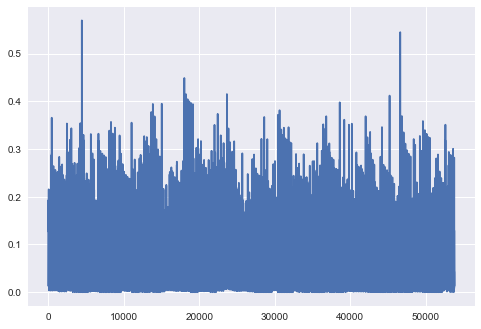

In [99]:
plt.plot(data['Succes_ration'])
plt.show()

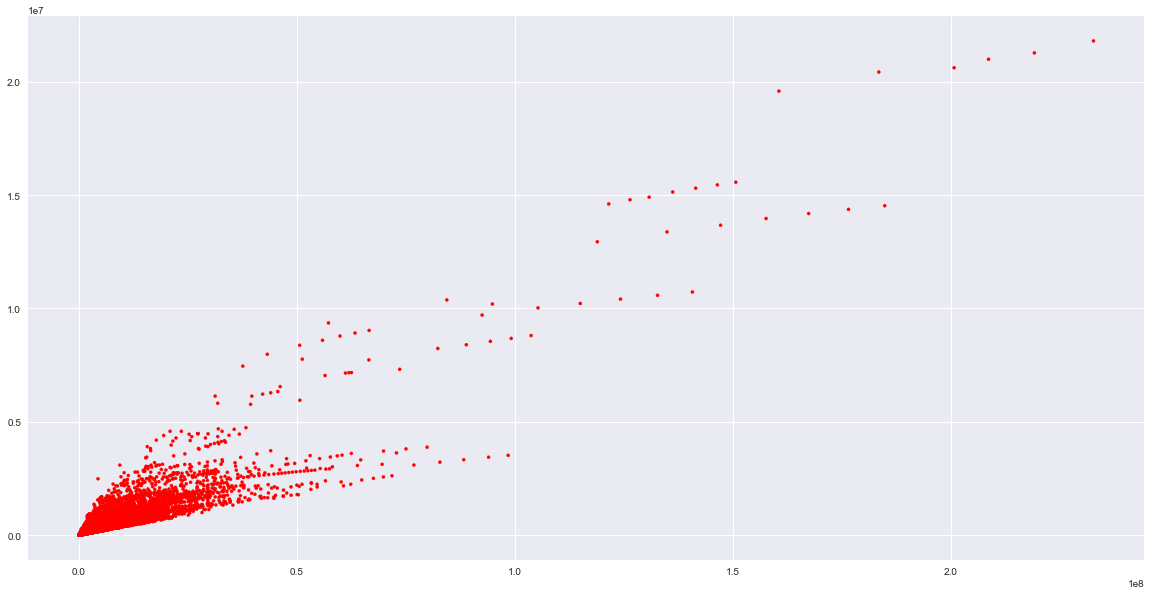

In [105]:
plt.style.use('seaborn')
plt.figure(figsize=(20, 10))
plt.scatter(data['view_count'], data['likes']+data['comment_count'], s=data['Succes_ration']*10, c='r')
plt.show()

In [101]:
def succes_r(col):
    if col>=0.035:
        return 1
    else :
        return 0

In [102]:
data['Succes_ration'] = data['Succes_ration'].apply(succes_r)

In [103]:
data['Succes_ration'].value_counts()

1    37763
0    16028
Name: Succes_ration, dtype: int64

In [110]:

data.drop(['categoryId', 'view_count', 'likes','dislikes', 'comment_count','Unnamed: 0'], axis=1, inplace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,Succes_ration
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [112]:
Y = data['Succes_ration']
data.drop(['Succes_ration'], inplace=True, axis = 1)

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
x_train, x_test, y_train, y_test = train_test_split(data, Y)

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
lg = LogisticRegression()
lg.fit(x_train, y_train)

D:\programs\conda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [117]:
lg.score(x_test, y_test)

0.8924747174301011

* Score will increase in Future 
* For now logistic regression was used to test 

In [ ]:
knn.fit(x, y)